In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
fnames = get_image_files('bacteria-dataset/full_images_alt')

In [5]:
fnames[:5]

[PosixPath('bacteria-dataset/full_images_alt/Actinomyces.israeli_0001.tif'),
 PosixPath('bacteria-dataset/full_images_alt/Actinomyces.israeli_0002.tif'),
 PosixPath('bacteria-dataset/full_images_alt/Actinomyces.israeli_0003.tif'),
 PosixPath('bacteria-dataset/full_images_alt/Actinomyces.israeli_0004.tif'),
 PosixPath('bacteria-dataset/full_images_alt/Actinomyces.israeli_0005.tif')]

In [6]:
np.random.seed(42)
pat = r'/([^/]+)_\d+.tif$'

In [7]:
data = ImageDataBunch.from_name_re('bacteria-dataset/full_images_alt', fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [8]:
print(data.classes)
print(len(data.classes))

['Acinetobacter.baumanii', 'Actinomyces.israeli', 'Bacteroides.fragilis', 'Bifidobacterium.spp', 'Candida.albicans', 'Clostridium.perfringens', 'Enterococcus.faecalis', 'Enterococcus.faecium', 'Escherichia.coli', 'Fusobacterium', 'Lactobacillus.casei', 'Lactobacillus.crispatus', 'Lactobacillus.delbrueckii', 'Lactobacillus.gasseri', 'Lactobacillus.jehnsenii', 'Lactobacillus.johnsonii', 'Lactobacillus.paracasei', 'Lactobacillus.plantarum', 'Lactobacillus.reuteri', 'Lactobacillus.rhamnosus', 'Lactobacillus.salivarius', 'Listeria.monocytogenes', 'Micrococcus.spp', 'Neisseria.gonorrhoeae', 'Porfyromonas.gingivalis', 'Propionibacterium.acnes', 'Proteus', 'Pseudomonas.aeruginosa', 'Staphylococcus.aureus', 'Staphylococcus.epidermidis', 'Staphylococcus.saprophiticus', 'Streptococcus.agalactiae', 'Veionella']
33


In [9]:
print('hello')

hello


In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,3.817713,2.944878,0.759124
2,2.632171,1.093049,0.248175
3,1.929509,0.544141,0.167883
4,1.509456,0.457186,0.145985


In [12]:
learn.save('stage-1')

In [14]:
data = ImageDataBunch.from_name_re('bacteria-dataset/full_images_alt', fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [16]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 64719922.59it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


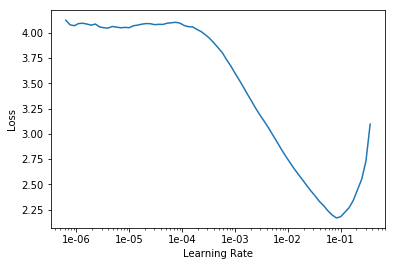

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,2.853813,1.561166,0.306569
2,1.639013,0.248170,0.058394
3,1.101536,0.230741,0.080292
4,0.781610,0.159655,0.043796
5,0.587977,0.132877,0.036496
6,0.455316,0.115520,0.036496
7,0.356362,0.108675,0.029197
8,0.293171,0.109001,0.029197


In [19]:
learn.save('stage-1-50')

In [20]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.178638,0.100145,0.021898
2,0.176825,0.093956,0.014599
3,0.159130,0.092905,0.014599
